### Get frames

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from color_matcher import ColorMatcher
from color_matcher.io_handler import load_img_file, save_img_file, FILE_EXTS
from color_matcher.normalizer import Normalizer

# 22:52:45:00
aligned_frames = { 
    'Schyma_4K_calibrated.m4v': 3623,
    'Schyma_RX_4K_wide_angle_calibrated.m4v': 2337,
    'Seimon_4K_calibrated_2024_corrected.m4v': 32276,
    'Talbot_4K_calibrated.m4v': 62302,
    'Krastel_Nikon_HD_1080_calibrated_sequence.m4v': 2408
}

def get_frames(video_path, offset, rate, frame_count):
    cap = cv2.VideoCapture(video_path)
    frames = []
    for i in range(frame_count):
        cap.set(cv2.CAP_PROP_POS_FRAMES, offset + i * rate)
        ret, frame = cap.read()
        frames.append(frame)
    cap.release()
    return frames

def color_match(frames, reference_frame):
    cm = ColorMatcher()
    for i, frame in enumerate(frames):
        frames[i] = cm.transfer(src=frame, ref=reference_frame, method='mkl')
    return frames



ModuleNotFoundError: No module named 'color_matcher'

In [ ]:
path = ''
offset = 5200

schyma = get_frames(path + 'Schyma_4K_calibrated.m4v', aligned_frames['Schyma_4K_calibrated.m4v'] + offset, 15, 20)
schyma_rx = get_frames(path + 'Schyma_RX_4K_wide_angle_calibrated.m4v', aligned_frames['Schyma_RX_4K_wide_angle_calibrated.m4v'] + offset, 15, 20)
talbot = get_frames(path + 'Talbot_4K_calibrated.m4v', aligned_frames['Talbot_4K_calibrated.m4v'] + offset, 15, 20)

In [ ]:
path = '/fs/nexus-projects/3dtornadoes/data/videos/'


for video in aligned_frames.keys():
    cap = cv2.VideoCapture(os.path.join(path, video))
    cap.set(cv2.CAP_PROP_POS_FRAMES, aligned_frames[video] - 1250)
    ret, frame = cap.read()
    cap.release()

    plt.figure(figsize=(20, 10))
    plt.imshow(frame)
    cv2.imwrite('{}.png'.format(video.split('.')[0]), frame)
# cv2.imwrite('krastel_cow.png', frame)
# 

In [67]:
ref = cv2.cvtColor(schyma_rx[0], cv2.COLOR_BGR2RGB)
cm = ColorMatcher()
names = ['schyma', 'schyma_rx', 'talbot']

output_path = '/fs/nexus-projects/3dtornadoes/data/combined_group'
os.makedirs(output_path, exist_ok=True)

for i, arr in enumerate([schyma, schyma_rx, talbot]):
    for j, frame in enumerate(arr):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cm.transfer(frame, ref=ref, method='mkl')
        frame = Normalizer(frame).uint8_norm()
        save_img_file(frame, os.path.join(output_path, f'{names[i]}_{j}.png'))
        

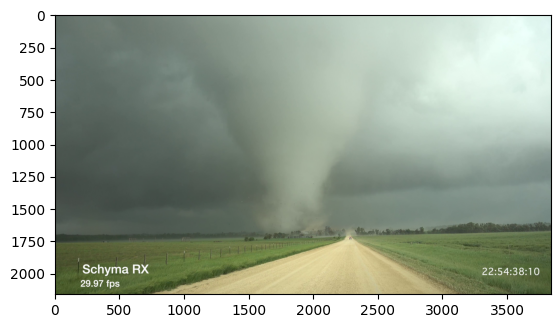

In [68]:
plt.imshow(ref)

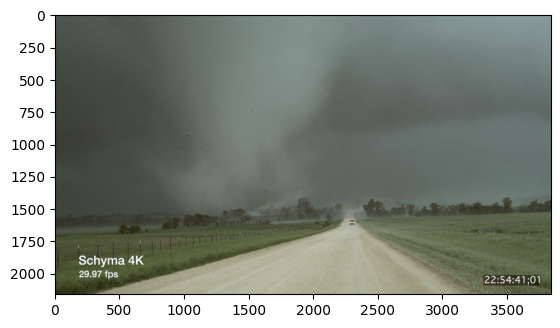

In [72]:
plt.imshow(cv2.imread(output_path+'/'+os.listdir(output_path)[30]))

In [ ]:
output_path = '/fs/nexus-projects/3dtornadoes/data/schyma_frame_group'
os.makedirs(output_path, exist_ok=True)

for i, frame in enumerate(schyma):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    save_img_file(frame, os.path.join(output_path, f'Schyma_4K_calibrated_{i}.png'))

OSError: [Errno 28] No space left on device

In [13]:
for i, frame in enumerate(krastel):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    save_img_file(frame, f'./frame_groups/krastel/Krastel_Nikon_HD_1080_calibrated_sequence_{i}.png')

### Visualize colmap cameras 

In [ ]:
import 